In [1]:
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage import io, filters, color, measure
from skimage.feature import peak_local_max
from scipy import ndimage 
import numpy as np
import xlrd
import freud.box
from freud import box, density
from scipy import stats
import os
%matplotlib inline

def get_dots2(file,microns=2,compare=False,spacing=5):
    image = color.rgb2gray(io.imread(file))
    i1 = filters.gaussian(image,sigma=.7)
    i1 = ndimage.maximum_filter(i1,size=10,mode='constant')
    coordinates = peak_local_max(i1, min_distance=spacing,indices=False)
    if compare:
        io.imshow(image -coordinates)
    label_img = measure.label(coordinates)
    centroids = []
    for region in measure.regionprops(label_img):
        centroids.append(region.centroid)
    scaled = microns*np.asarray(centroids)/image.shape - [microns/2,microns/2]
    return np.append(scaled,np.zeros((len(scaled),1)),axis=1)

def plot_rdf(dots,L,plot=True):
    box = freud.box.Box(L,L,is2D=True)
    box.periodic=[True,True,False]
    rdf = freud.density.RDF(20,.49,normalize=True)
    rdf.compute(system=(box,dots),reset=True)
    if plot:
        plt.scatter(rdf.bin_centers, rdf.rdf)
        plt.xlabel("r (μm)")
        plt.ylabel("<g(r)>")
        plt.show()
    return rdf.bin_centers, rdf.rdf

In [2]:
rdfs = []


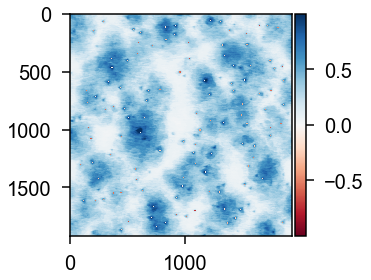

In [3]:
L=5
dots=get_dots2("87/5a.tif",compare=True,microns=L, spacing=50)


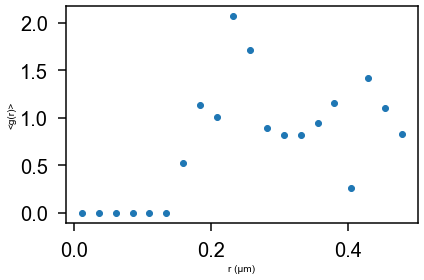

In [4]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


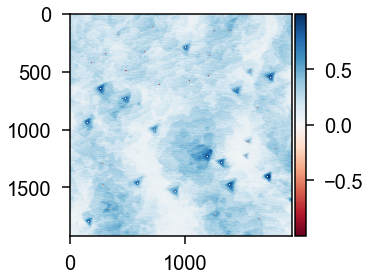

In [5]:
L=2
dots=get_dots2("87/2f.tif",compare=True, microns =L, spacing=100)


In [6]:
#rdfs.append(plot_rdf(dots,L,plot=True)[1])


In [7]:
L=2
for i in "abcdefghi":
    dots=get_dots2("87/2"+i+".tif",compare=False, microns =L, spacing=20)
    rdfs.append(plot_rdf(dots,L,plot=False)[1])


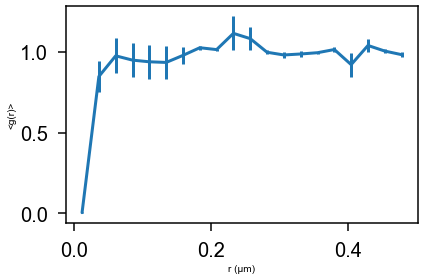

In [8]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
r,rdf = plot_rdf(dots,L,plot=False)
plt.errorbar(r, mean_count, yerr=sem)
plt.xlabel("r (μm)")
plt.ylabel("<g(r)>")
plt.savefig("M87.png")
np.savetxt("M87.csv",(r,mean_count,sem),delimiter=',')
plt.show()